In [1]:
import pandas as pd
import numpy as np
from numpy import mean, cov, argsort, dot
from numpy.linalg import eigh
import seaborn as sns

In [2]:
# Load the dataset
dataset = pd.read_csv("Data_Cortex_Nuclear.csv")

print("Dataset shape: ", dataset.shape)
dataset.head()

Dataset shape:  (1080, 82)


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
# Extract the 77 protein modifications
data = dataset.iloc[:,1:78]
print("Extracted data shape:", data.shape)
data.head()

Extracted data shape: (1080, 77)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [4]:
# Mean imputation of missing values in the dataset with mean column values
data.fillna(data.mean(), inplace=True)

print("Data shape after mean imputation:", data.shape)
data.head()

Data shape after mean imputation: (1080, 77)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [5]:
# Calculate the mean of each column
M = mean(data, 0)

# Calculate centered matix - center each column by subtracting the corrosponding column mean
data = data - M

# Calculate the covariance matrix of centered matrix
covM= cov(data, rowvar=False)

# Eigen Decomposition of covariance matrix
evals, evecs = eigh(covM)

# Sort eigenvalue in decreasing order
idx = argsort(evals)[::-1]
evecs = evecs[:,idx]

# Sort eigenvectors according to same index
evals = evals[idx]

# Select the first 2 eigenvectors as principle components
dims_rescaled_data = 2
evecs = evecs[:, :dims_rescaled_data]

#Project the data
P = evecs.T.dot(data.T).T
print(P)

[[-1.33783565  2.74036117]
 [-0.92347474  2.50339481]
 [-0.894646    2.51039517]
 ...
 [ 2.80183078 -0.74375694]
 [ 2.51784238 -0.66635383]
 [ 1.97329921 -0.5398095 ]]


In [6]:
# Create a new dataset with projected features from PCA
pcaData = dataset[['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']].copy()
pcaData['PC1'] = P[:,0]
pcaData['PC2'] = P[:,1]
pcaData.head()

,MouseID,Genotype,Treatment,Behavior,class,PC1,PC2
0,309_1,Control,Memantine,C/S,c-CS-m,-1.337836,2.740361
1,309_2,Control,Memantine,C/S,c-CS-m,-0.923475,2.503395
2,309_3,Control,Memantine,C/S,c-CS-m,-0.894646,2.510395
3,309_4,Control,Memantine,C/S,c-CS-m,-0.019634,1.877684
4,309_5,Control,Memantine,C/S,c-CS-m,0.218342,1.712931


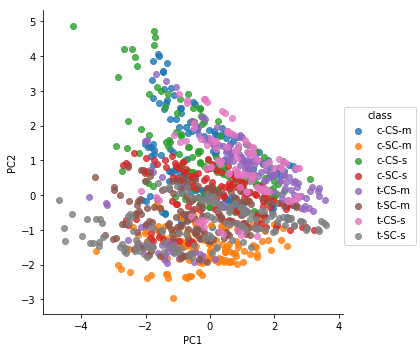

In [7]:
# Visualize the PCA results
sns.lmplot(x="PC1", y="PC2", data=pcaData, fit_reg=False, hue='class', legend=True)

#### Conclusion based on analysis: 